## Fit a Gaussian

Create a data set that follows a noisy Gaussian Distribution and then use lmfit library to fit a gaussian to the dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#! pip install lmfit
import lmfit.models as models
from lmfit import Model
from matplotlib.patches import Ellipse

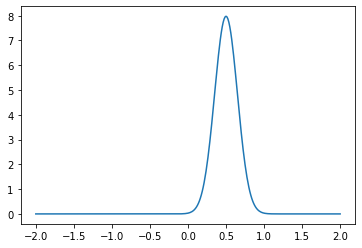

In [2]:
# Create the data
gaussmodel = models.gaussian # function

# Define four variables for the gaussian
x = np.linspace(-2,2,321)

a = 3 # amplitude
c = 0.5 # center peak
s = 0.15 # shape

data = gaussmodel(x,a,c,s)

plt.plot(x,data);

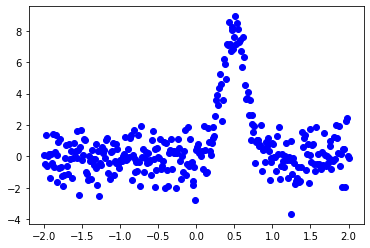

In [3]:
data = data + np.random.randn(len(x))
plt.plot(x,data, "bo");

In [4]:
# Now fit a Gaussian to the noisy data to find the best parameters
# Create a model Instance
gaussfit = Model(gaussmodel)
result = gaussfit.fit(data, x = x)

result
# The parameters are quite close to initial parameters given to the model

In [5]:
# Get the R-Square fit
# This fucntion gives an rray of data obtained by the model
result.best_fit[:10]

array([3.40027357e-62, 1.43079647e-61, 5.97729035e-61, 2.47909595e-60,
       1.02080976e-59, 4.17309989e-59, 1.69369514e-58, 6.82455270e-58,
       2.73008165e-57, 1.08427532e-56])

In [6]:
# Get the coprrelation between model and intial data
np.corrcoef(data, result.best_fit)

array([[1.       , 0.8938862],
       [0.8938862, 1.       ]])

In [7]:
# The R2 fit
r2 = np.corrcoef(data, result.best_fit)[0,1]**2
r2

0.7990325360189496

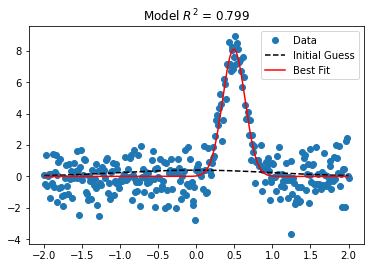

In [8]:
# Visualize
plt.plot(x, data, "o", label = "Data")
plt.plot(x, result.init_fit, "k--", label = "Initial Guess")
plt.plot(x, result.best_fit, "r", label = "Best Fit")
plt.title("Model $R^2$ = %.3f"%r2)
plt.legend()
plt.show()

## Fit Exponential Decay

The equation of exponential decay model is given by $y = \frac{1}{x^2} + \epsilon$ where $x \in (1,10)$ and $\epsilon \in N(0, 0.1)$

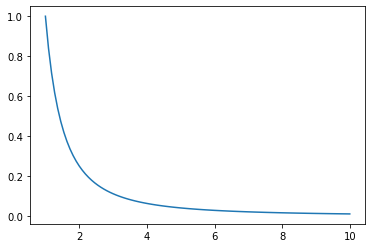

In [9]:
x = np.linspace(1,10, 100)
y = 1/x**2
plt.plot(x,y);

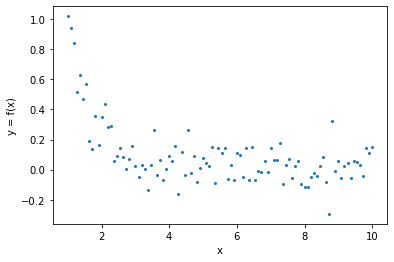

In [10]:
# Add Noise to the data
y = 1/x**2 + np.random.normal(loc=0, scale=np.sqrt(0.01), size=len(x))
plt.plot(x,y, "o",markersize = 2)
plt.ylabel("y = f(x)")
plt.xlabel("x")
plt.show()

In [11]:
exp_decay = Model(models.exponential)
result = exp_decay.fit(y, x = x)
result
# One liner
# result = Model(models.exponential).fit(y,x=x)

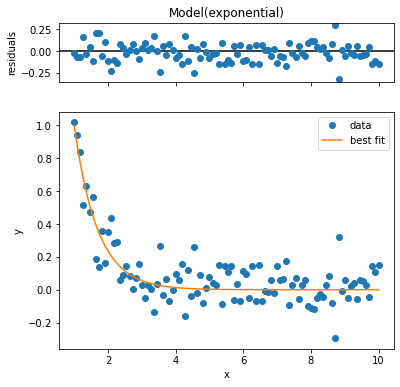

In [12]:
# Simple method to plot
result.plot();

In [13]:
r2 = np.corrcoef(y, result.best_fit)[0,1]**2
r2

0.7583975925693985

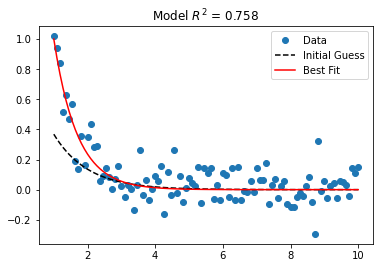

In [14]:
# My Visualization (longer as usual :) 
plt.plot(x, y, "o", label = "Data")
plt.plot(x, result.init_fit, "k--", label = "Initial Guess")
plt.plot(x, result.best_fit, "r", label = "Best Fit")
plt.title("Model $R^2$ = %.3f"%r2)
plt.legend()
plt.show()

## Sigmoid Function

Sigmoid function is defined as: $y = \frac{\alpha}{1 + exp(-\beta(x - \tau))}$. The conventional parameters are: $\alpha = 1, \beta = 1, \tau = 0$. Alpha controlls the height, beta the steepness and tau is the center point of the graph.

In [15]:
def sigmoid(x,a=1,b=1,t=0):
    """
    x is the data
    a is alpha
    b is betta
    t is tau
    """
    eterm = np.exp(-b*(x-t))
    return a/(1+eterm)

x = np.linspace(-2,2, 250)
y = sigmoid(x, a=2, b=5)

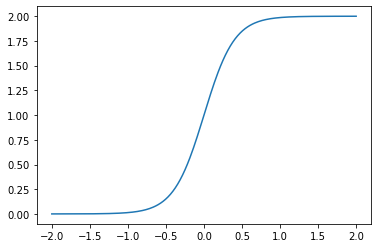

In [16]:
plt.plot(x,y)
plt.show()

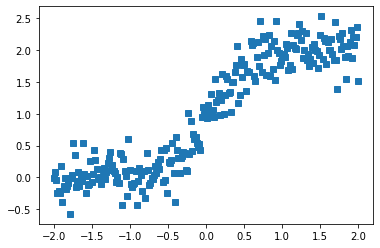

In [17]:
# Add Noise
x = np.linspace(-2,2, 250)
y = sigmoid(x, a=2, b=5) + np.random.randn(len(x))/4
plt.plot(x,y, "s")
plt.show()

In [18]:
# Model Fitting
sigmodel = Model(sigmoid) # We use the function created above
result = sigmodel.fit(y,x=x)
result

In [19]:
res2 = np.corrcoef(y, result.best_fit)[0,1]**2
res2

0.9344701527184814

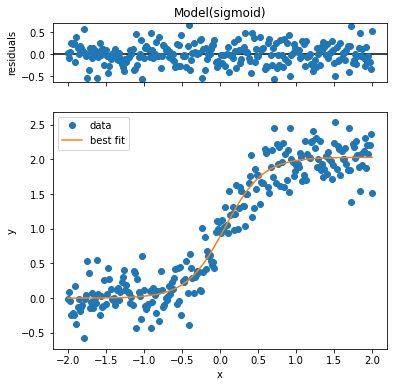

In [20]:
result.plot();

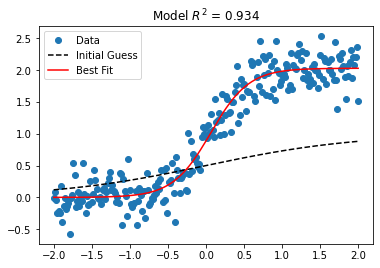

In [21]:
# My Visualization (longer as usual :) 
plt.plot(x, y, "o", label = "Data")
plt.plot(x, result.init_fit, "k--", label = "Initial Guess")
plt.plot(x, result.best_fit, "r", label = "Best Fit")
plt.title("Model $R^2$ = %.3f"%res2)
plt.legend()
plt.show()

## Conjunctive Model Fitting

This model is defined as $y = \frac{sin(x)}{x} + v, v \in (-1,1)$. We will then fit a curve to this data using a Gaussian plus a linear function combined into a single Conjunctive Model.

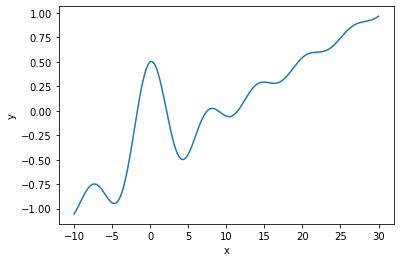

In [22]:
# Create the data
x = np.linspace(-10,30, 1000)
y = np.sin(x)/x + np.linspace(-1,1,len(x))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

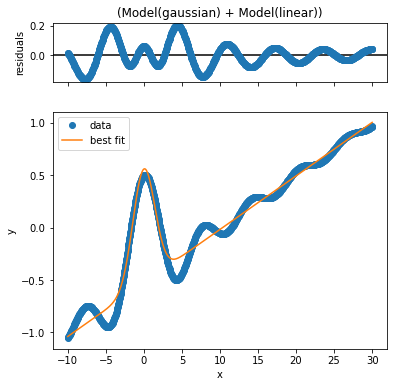

In [23]:
# Create a conjunctive models with two components
conj_model = Model(models.gaussian) + Model(models.linear)

results = conj_model.fit(y,x=x)

results.plot();

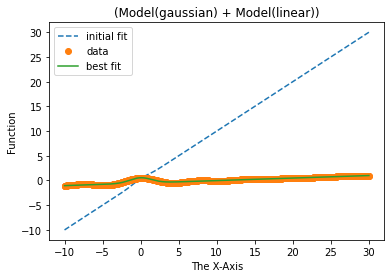

In [24]:
results.plot_fit(ylabel = "Function", xlabel = "The X-Axis", show_init = True);

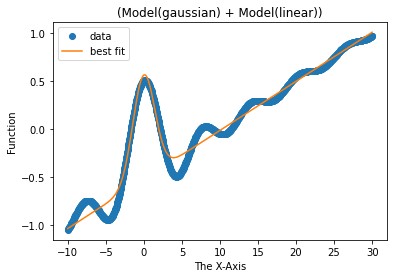

In [25]:
results.plot_fit(ylabel = "Function", xlabel = "The X-Axis", show_init = False);

In [26]:
res2 = np.corrcoef(y, results.best_fit)[0,1]**2
res2

0.9795210837362952

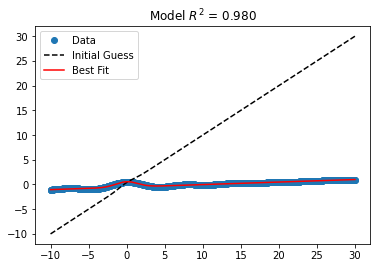

In [27]:
# My Visualization (longer as usual :) 
plt.plot(x, y, "o", label = "Data")
plt.plot(x, results.init_fit, "k--", label = "Initial Guess")
plt.plot(x, results.best_fit, "r", label = "Best Fit")
plt.title("Model $R^2$ = %.3f"%res2)
plt.legend()
plt.show()

## Multivariate Modeling

In this case we have a two-dimensional function defined by: 

$x = rcos(\theta) + \epsilon$

$y = rsin(\theta) + \epsilon$

$\theta \in (0, 2\pi) , \epsilon \in N(0, r^{-2})$

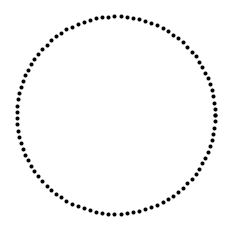

In [28]:
n = 100
th = np.linspace(0, np.pi*2, n)
r = 3

# x and y values
x = r*np.cos(th)
y = r*np.sin(th)
plt.plot(x,y, "k.")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.axis("off");

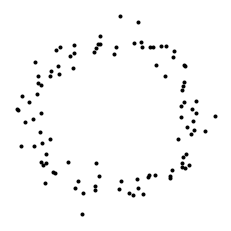

In [29]:
x = r*np.cos(th) + np.random.normal(0, 1/r, n)
y = r*np.sin(th) + np.random.normal(0, 1/r, n)
plt.plot(x,y, "k.")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.axis("off");

In [30]:
# Show empirically that the variance is as expected (close)
print(np.var(np.random.normal(0, 1/r, n)))
print(r**(-2))

0.1380083010632158
0.1111111111111111


In [31]:
# No built-in model in Model()
def circlefit(th,r=1):
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y

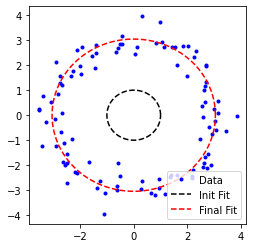

In [32]:
result = Model(circlefit).fit((x,y),th = th)

# result.plot(); doesnt work straightforward

plt.plot(x,y, "b.", label = "Data");
plt.plot(result.init_fit[0], result.init_fit[1], "k--", label = "Init Fit")
plt.plot(result.best_fit[0], result.best_fit[1], "r--", label = "Final Fit")
plt.legend()
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

## Bonus: The Eye of Sauron

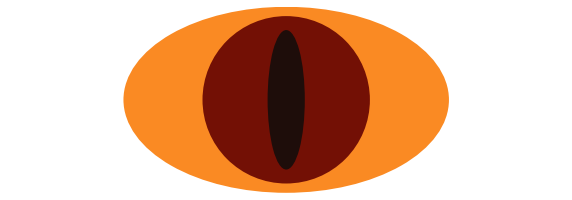

In [33]:
# The Sclera
e1 = Ellipse((0,0),width = 35, height = 20)
e1.set_facecolor((250/255, 138/255,35/255)) # RGB Values (range: 0->1)

# The Cornea
e2 = Ellipse((0,0),width = 18, height = 18)
e2.set_facecolor((115/255, 16/255,5/255)) # RGB Values (range: 0->1)

# The Pupil
e3 = Ellipse((0,0),width = 4, height = 15)
e3.set_facecolor((30/255, 13/255,10/255)) # RGB Values (range: 0->1)

fig, ax = plt.subplots(subplot_kw = {"aspect":"equal"}, figsize=(10,10))
ax.add_artist(e1)
ax.add_artist(e2)
ax.add_artist(e3)
ax.set_xlim(-30,30)
ax.set_ylim(-10,10)
ax.set_axis_off()
plt.show()